In [72]:
import csv
import cv2
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

lines = []
idx = 0
log_file = "./driving_log.csv"
# log_file = "./driving_log1.csv"
zero_steering_count = 0
column_names = ['center', 'left', 'right',
                'steering', 'throttle', 'brake', 'speed']

In [73]:
data_df = pd.read_csv(log_file,names=column_names)


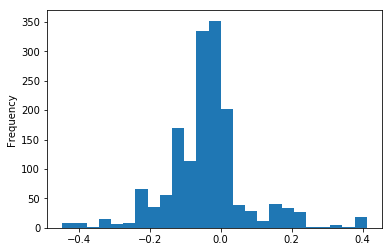

In [74]:
%matplotlib inline
data_df['steering'].plot.hist(bins=25)

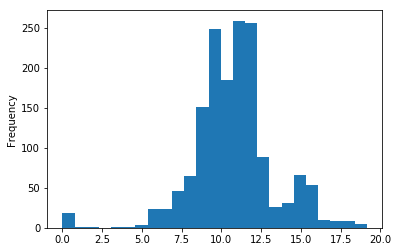

In [75]:
data_df['speed'].plot.hist(bins=25)

In [51]:
data_df['steering'].describe()


count    1582.000000
mean       -0.036578
std         0.116845
min        -0.446352
25%        -0.081545
50%        -0.034335
75%         0.004292
max         0.412017
Name: steering, dtype: float64

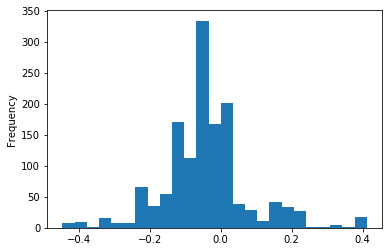

In [52]:
data_df.query('steering != 0')['steering'].plot.hist(bins=25)

In [53]:

def filter_driving_straight(data_df, hist_items=6):
    steering_history = deque([])
    
    drop_rows=[]
    
    for idx, row in data_df.iterrows():
        # controls = [getattr(row, control) for control in vehicle_controls]
        steering = getattr(row, 'steering')

        # record the recent steering history
        steering_history.append(steering)
        if len(steering_history) > hist_items:
            steering_history.popleft()

        # if just driving in a straight line continue
        if steering_history.count(0.0) == hist_items:
            drop_rows.append(idx)

    return data_df.drop(data_df.index[drop_rows])

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline



In [55]:
def crop_resize(img):
    cropped = cv2.resize(img[60:140, :], (64, 64))
    return cropped
def plot_cameras(img_left, img_center, img_right):
    fig = plt.figure(dpi=200)
    gs1 = gridspec.GridSpec(1,3,wspace=0.05)
    fig.add_subplot(gs1[0])
    plt.imshow(img_left)
    plt.title('left')
    plt.axis('off')
    fig.add_subplot(gs1[1])
    plt.imshow(img_center)
    plt.title('center')
    plt.axis('off')
    fig.add_subplot(gs1[2])
    plt.imshow(img_right)
    plt.title('right')
    plt.axis('off')


In [67]:
# line = lines[10]
idx = 430
source_path = data_df['center'][idx]
left_img_path = data_df['left'][idx]
right_img_path = data_df['right'][idx]
print(source_path)
print(left_img_path)
print(right_img_path)


/home/max/avmap/udacity/CarND-Behavioral-Cloning-P3/IMG/center_2017_09_11_18_09_39_417.jpg
/home/max/avmap/udacity/CarND-Behavioral-Cloning-P3/IMG/left_2017_09_11_18_09_39_417.jpg
/home/max/avmap/udacity/CarND-Behavioral-Cloning-P3/IMG/right_2017_09_11_18_09_39_417.jpg


(-0.5, 319.5, 159.5, -0.5)

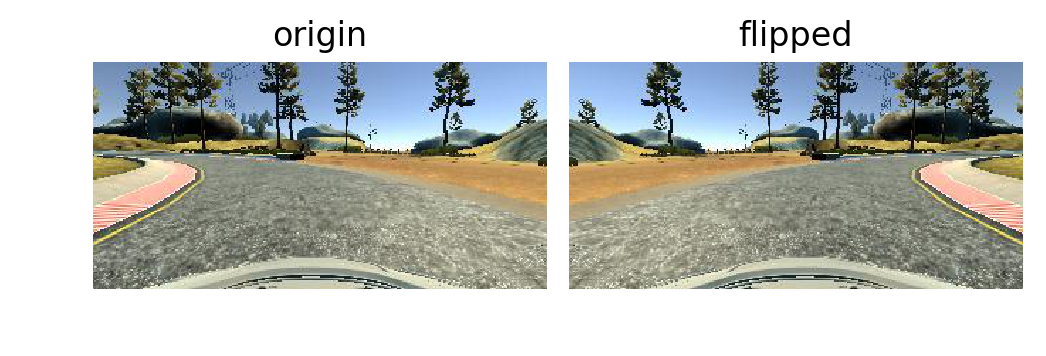

In [80]:
image = cv2.imread(source_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = crop_resize(image)

img_flip = cv2.flip(image, 1)

fig = plt.figure(dpi=200)
gs1 = gridspec.GridSpec(1,2,wspace=0.05)
fig.add_subplot(gs1[0])
plt.imshow(image)
plt.title('origin')
plt.axis('off')
fig.add_subplot(gs1[1])
plt.imshow(img_flip)
plt.title('flipped')
plt.axis('off')

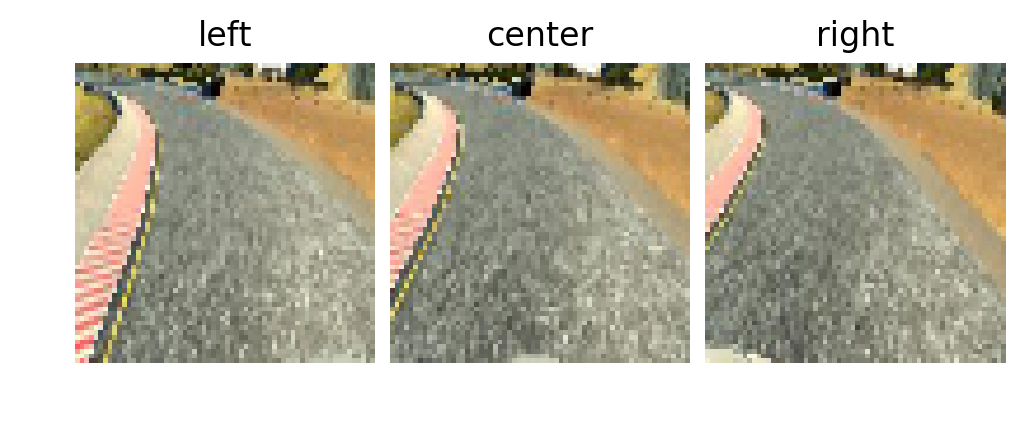

In [68]:


left_img = cv2.imread(left_img_path)
left_img = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
left_img = crop_resize(left_img)

right_img = cv2.imread(right_img_path)
right_img = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)
right_img = crop_resize(right_img)
    
plot_cameras(left_img,image,right_img)